# TELCO CHURN DATASET (Classification)

#### Context
"Predict behavior to retain customers. You can analyze all relevant customer data and develop focused customer retention programs." [IBM Sample Data Sets]

#### Content
Each row represents a customer, each column contains customer’s attributes described on the column Metadata.

#### The data set includes information about:

* Customers who left within the last month – the column is called Churn

* Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies

* Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges

* Demographic info about customers – gender, age range, and if they have partners and dependents

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

pd.set_option('display.max_columns',50)
pd.set_option('display.max_rows',500)

import warnings 
warnings.filterwarnings('ignore')

import statsmodels.api as sm
from sklearn.metrics import classification_report,accuracy_score,precision_score,recall_score,f1_score,\
confusion_matrix,cohen_kappa_score,roc_auc_score,roc_curve

## 1.  Data Understanding

In [2]:
df = pd.read_csv(r"C:\Users\hp\Downloads\archive (10)\WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
print('No.of.rows:',df.shape[0])
print()
print('No.of.columns:',df.shape[1])
print()
print('Number columns:',df.select_dtypes(np.number).columns.values)
print()
print('Categroical columns:',df.select_dtypes('object').columns.values)

No.of.rows: 7043

No.of.columns: 21

Number columns: ['SeniorCitizen' 'tenure' 'MonthlyCharges']

Categroical columns: ['customerID' 'gender' 'Partner' 'Dependents' 'PhoneService'
 'MultipleLines' 'InternetService' 'OnlineSecurity' 'OnlineBackup'
 'DeviceProtection' 'TechSupport' 'StreamingTV' 'StreamingMovies'
 'Contract' 'PaperlessBilling' 'PaymentMethod' 'TotalCharges' 'Churn']


In [4]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [5]:
df.SeniorCitizen.value_counts() #categorical Variable

0    5901
1    1142
Name: SeniorCitizen, dtype: int64

In [6]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [7]:
df['SeniorCitizen']=df['SeniorCitizen'].astype('object')

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
tenure,7043.0,32.371149,24.559481,0.00,9.00,29.000,55.0000,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.50,70.350,89.8500,118.75
TotalCharges,7032.0,2283.300441,2266.771362,18.80,401.45,1397.475,3794.7375,8684.80


In [9]:
df.describe(include='object').T

,count,unique,top,freq
customerID,7043,7043,7590-VHVEG,1
gender,7043,2,Male,3555
SeniorCitizen,7043,2,0,5901
Partner,7043,2,No,3641
Dependents,7043,2,No,4933
PhoneService,7043,2,Yes,6361
MultipleLines,7043,3,No,3390
InternetService,7043,3,Fiber optic,3096
OnlineSecurity,7043,3,No,3498
OnlineBackup,7043,3,No,3088


## 2. Data Preprocessing
#### Missing Values

In [10]:
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [11]:
#Tenure = 0, missing values 
df[df['tenure']==0]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [12]:
df[df['Contract']=='Two year']['tenure'].mean()

56.73510324483776

In [13]:
df.groupby('Contract')['tenure'].mean()

Contract
Month-to-month    18.036645
One year          42.044807
Two year          56.735103
Name: tenure, dtype: float64

In [14]:
df['tenure']=np.where((df['tenure']==0) & (df['Contract']=='Two year'),df[df['Contract']=='Two year']['tenure'].mean(),df['tenure'])

In [15]:
df['tenure']=np.where((df['tenure']==0) & (df['Contract']=='One year'),df[df['Contract']=='One year']['tenure'].mean(),df['tenure'])

In [16]:
df['TotalCharges'].fillna(df['TotalCharges'].mean(),inplace=True)

In [17]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

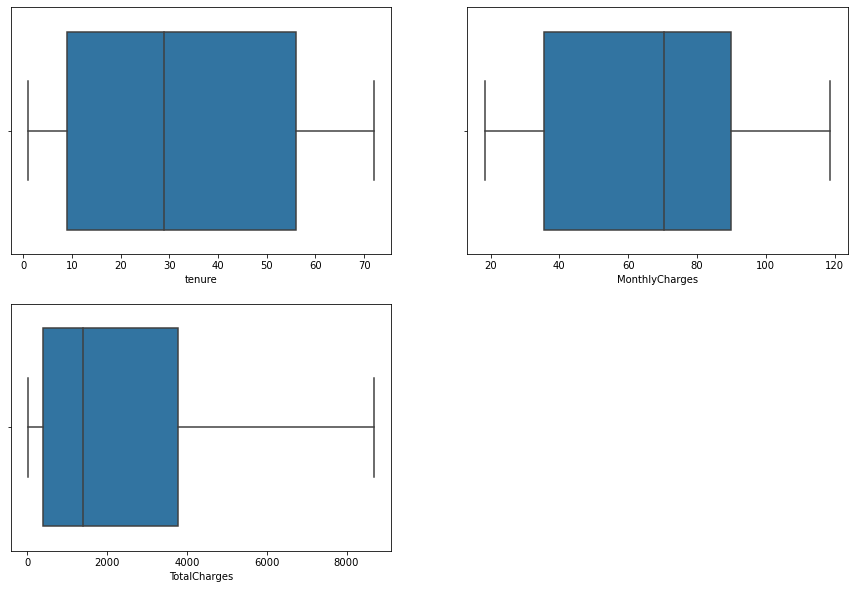

In [18]:
#There are no outliers in the data
plt.figure(figsize=(15,10))
t=1
for i in df.select_dtypes(include=np.number).columns:
    plt.subplot(2,2,t)
    sns.boxplot(df[i])
    t=t+1
plt.show()

#### Univariate Analysis

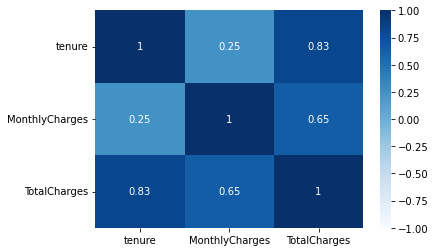

In [19]:
sns.heatmap(df.corr(),vmax=1,vmin=-1,cmap='Blues',annot=True)
plt.show()

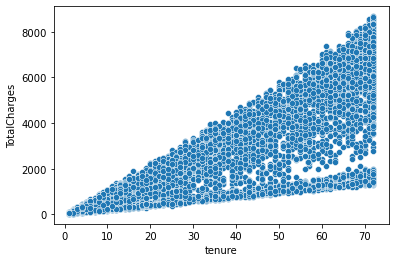

In [20]:
sns.scatterplot(df.tenure,df.TotalCharges)
plt.show()

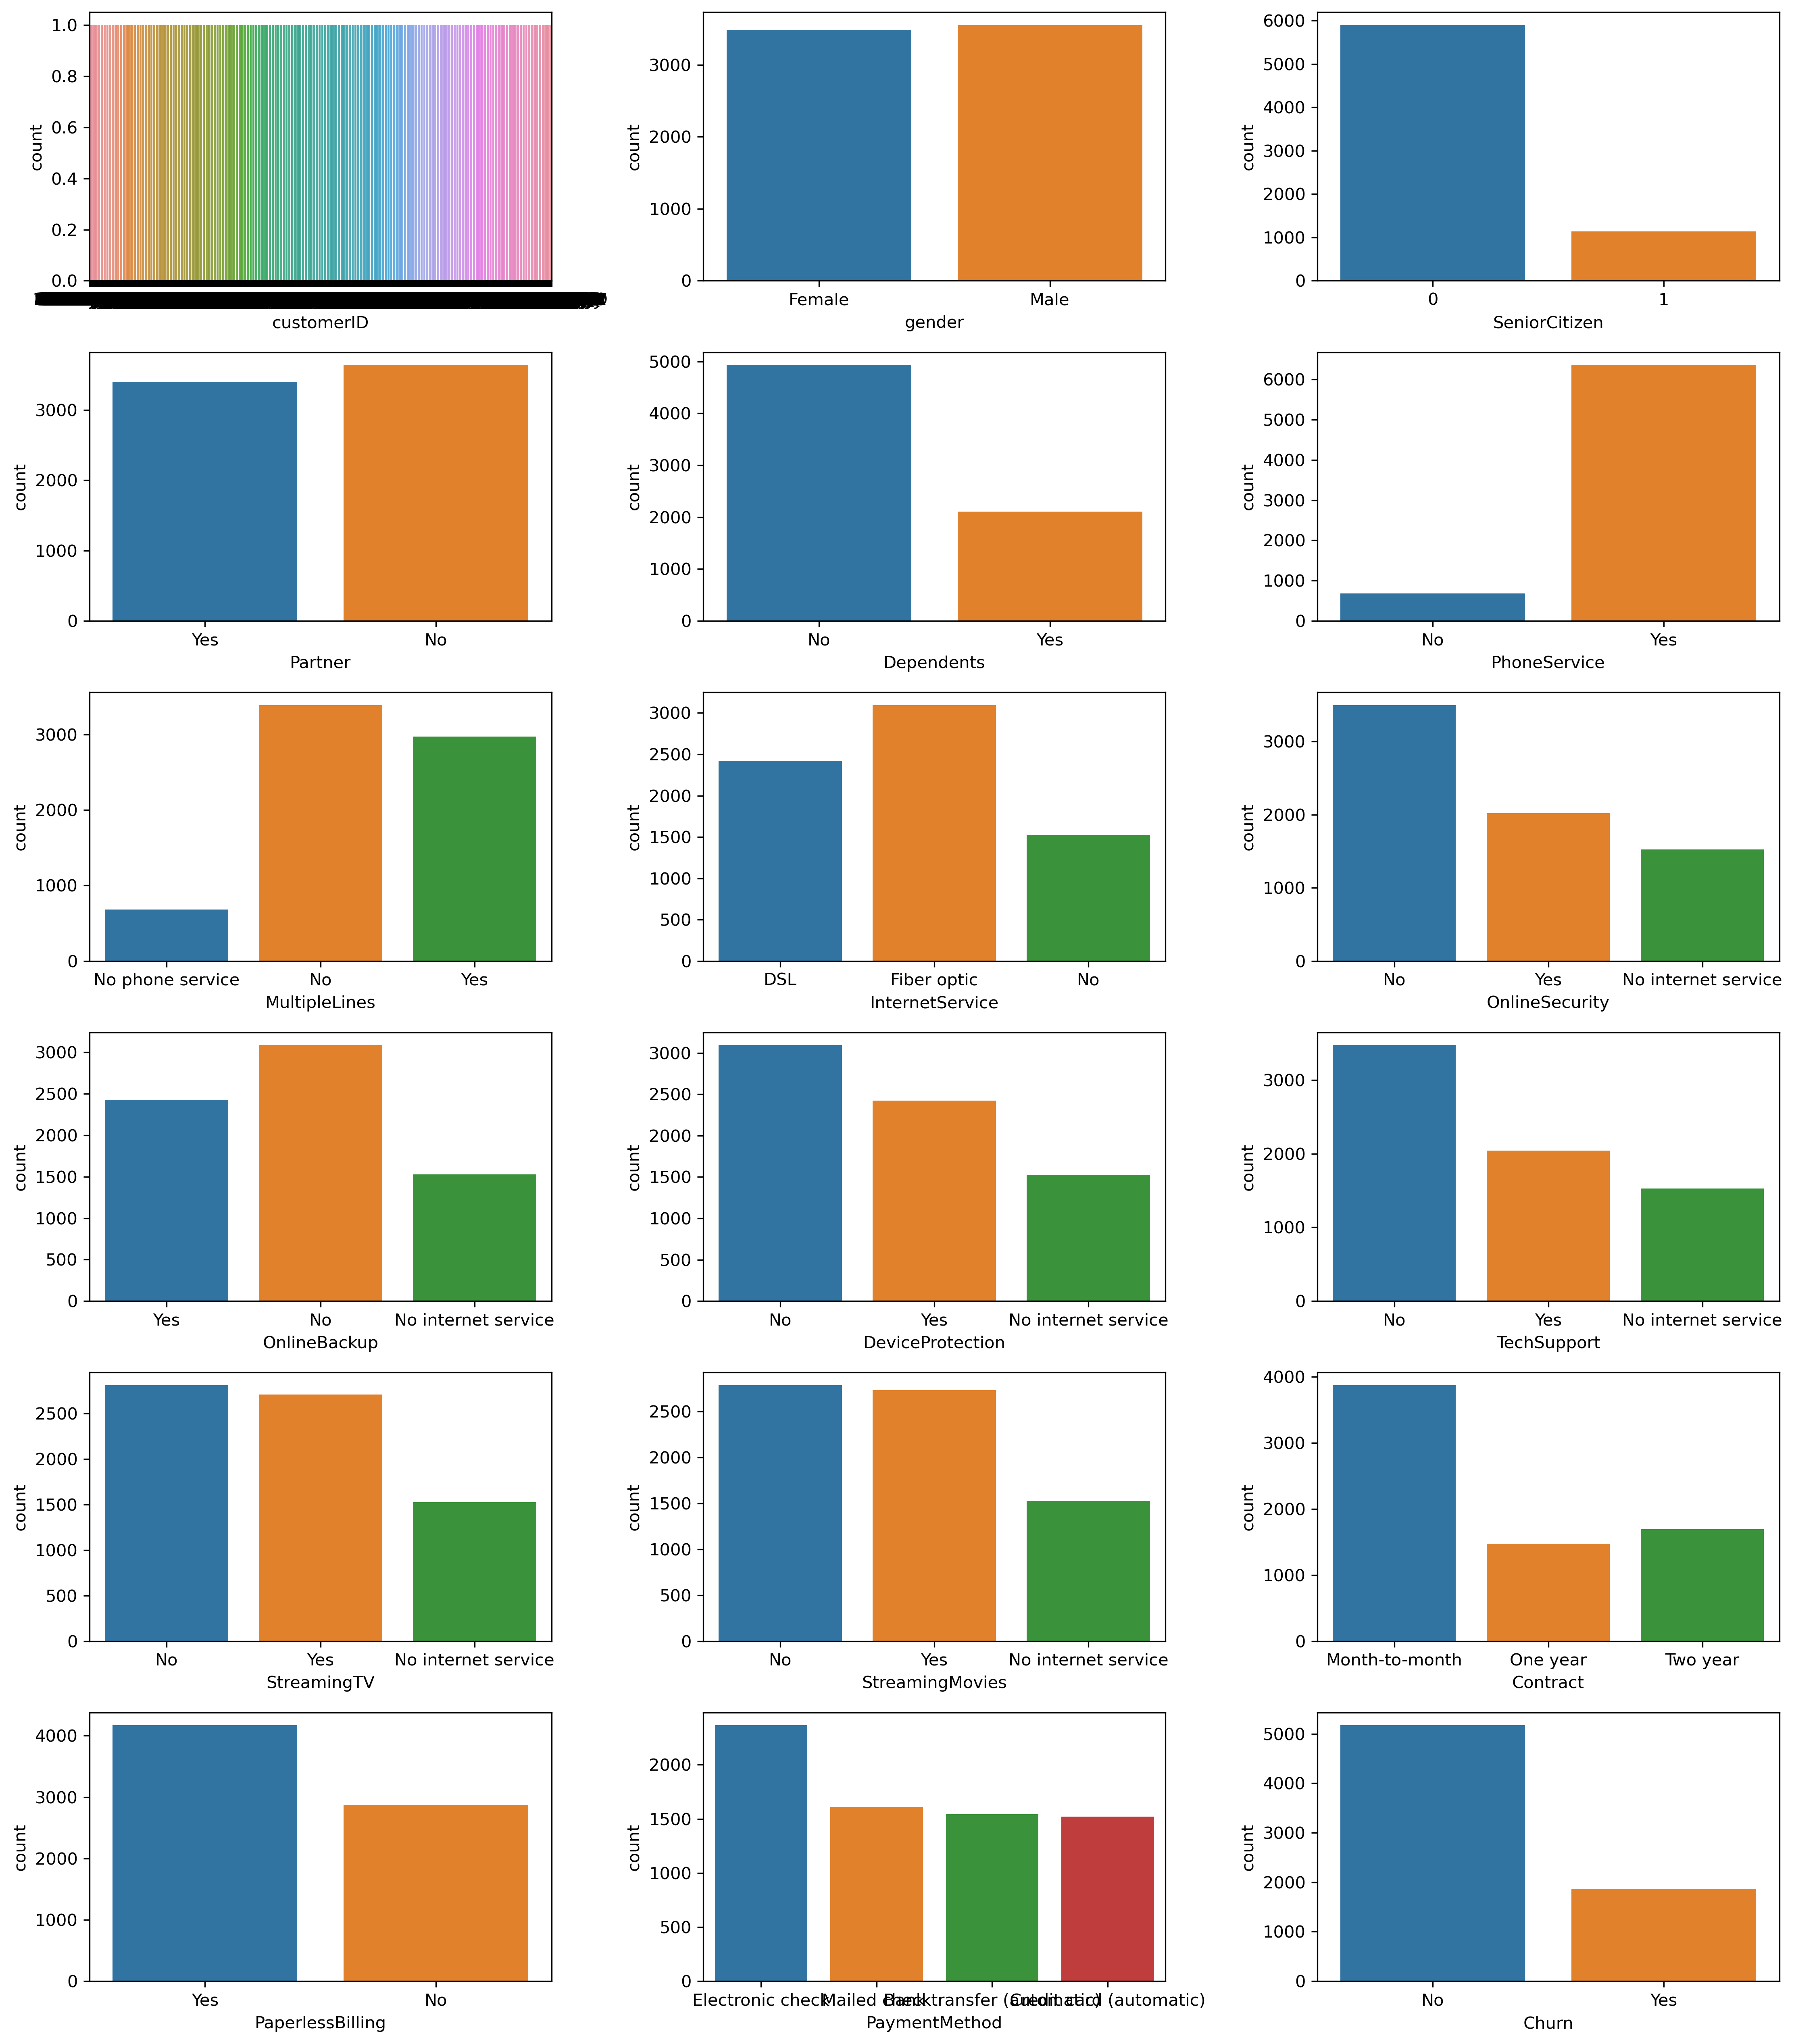

In [21]:
plt.figure(figsize=(15,17),dpi=300)
t=1
for i in df.select_dtypes(include='object').columns:
    plt.subplot(6,3,t)
    sns.countplot(df[i])
    t=t+1
plt.tight_layout()
plt.show()

#### Inferences:
* Customer Id has 7043 unique values and doesn't add any additional information in model building. So this column will be dropped.
* Our Target Audience is Non-Senior Citizens as they are taking our services more.
* Maximum Customers have no Dependents Taking Phone Service.
* Majority people have Month-to-Month contract
* Most Classes have imbalanced categories.
* There is a Class Imbalance in Target Variable- People leaving the service (Churn-Yes) are very less.
* There is some positive correlatin in Tenure vs Total Charges.

In [22]:
df.drop(columns=['customerID'],inplace=True)

#### Outlier Treatment

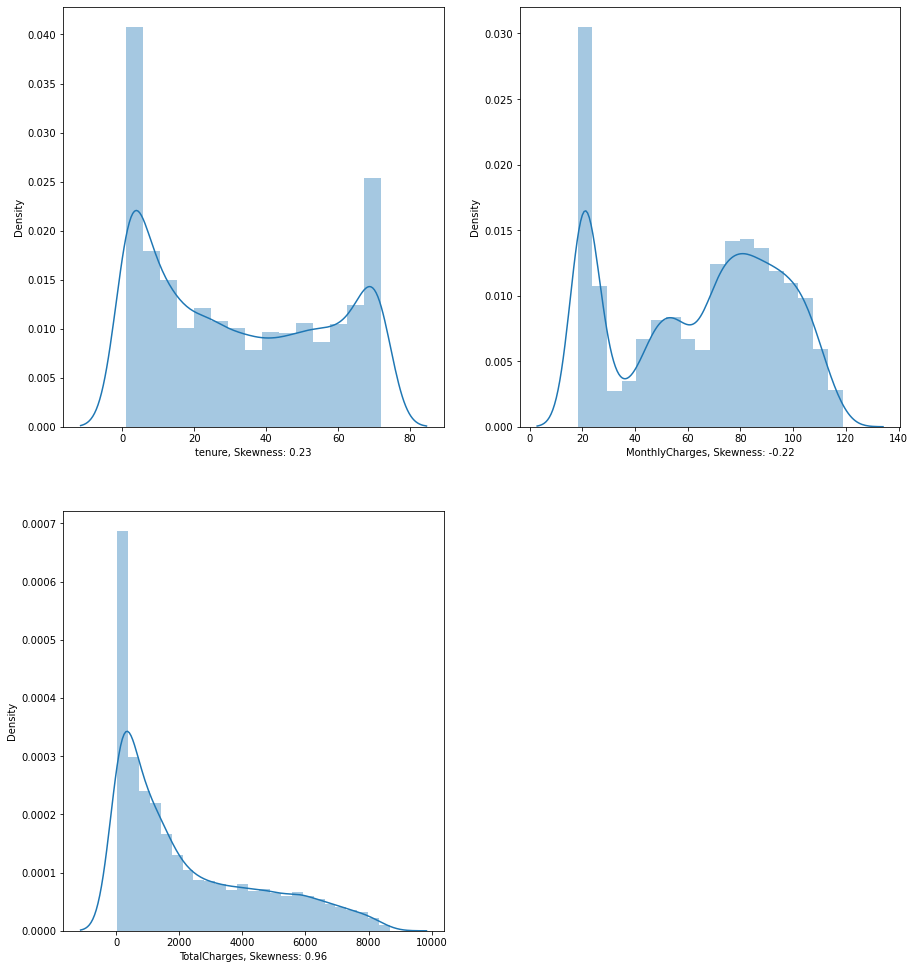

In [23]:
plt.figure(figsize=(15,17))
t=1
for i in df.select_dtypes(include=np.number).columns:
    plt.subplot(2,2,t)
    sns.distplot(df[i])
    plt.xlabel('%s, Skewness: %.2f'%(i,df[i].skew()))
    t=t+1
plt.show()

* Data is not normal, it is skewed. TotalCharges are highly Right-Skewed

#### Bivariate Analysis

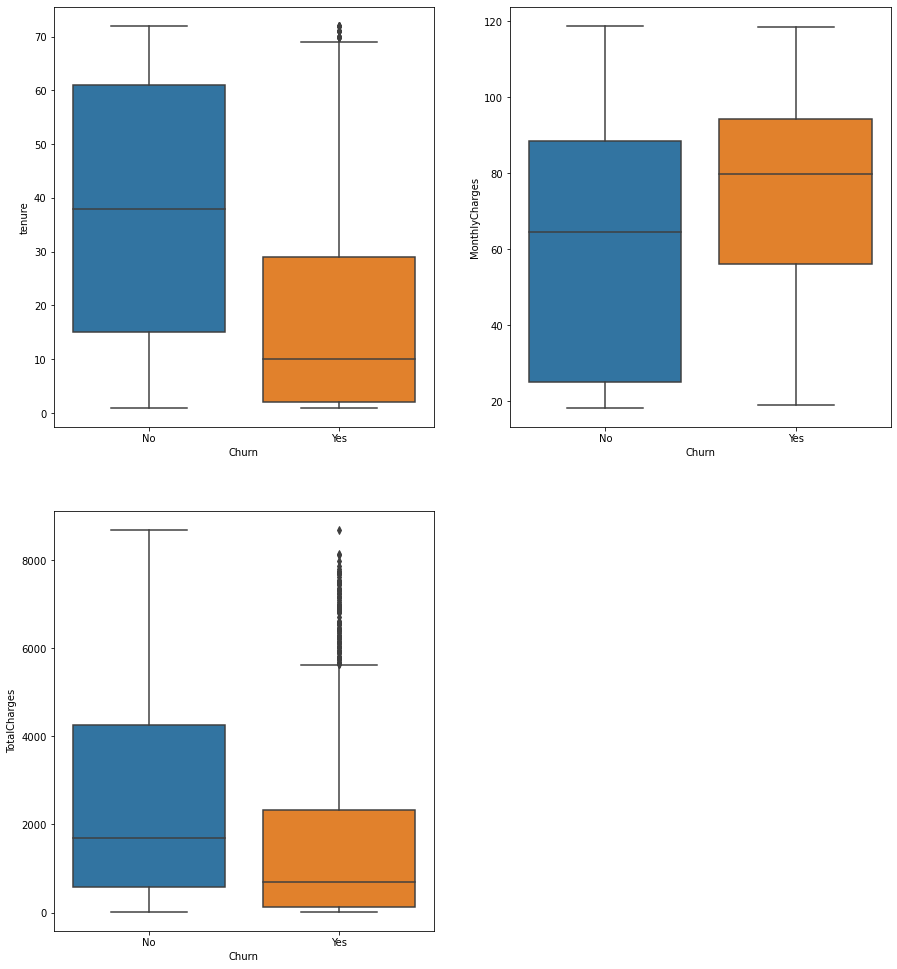

In [24]:
#Cat vs Num
plt.figure(figsize=(15,17))
t=1
for i in df.select_dtypes(include=np.number).columns:
    plt.subplot(2,2,t)
    sns.boxplot(df['Churn'],df[i])
    t+=1
plt.show()

#### Inferences:
* More Tenure, More Retention i.e. People with longer contracts retain with the services
* If Monthly Charges are more, People leave the services i.e. People don't prefer expensive plans.

In [25]:
num_cols=df.select_dtypes(include=np.number).columns

In [26]:
cat_cols=df.select_dtypes(include='object').columns

#### Class Imbalance

In [27]:
df['Churn']=df['Churn'].map({'Yes':1,'No':0})

<AxesSubplot:ylabel='Churn'>

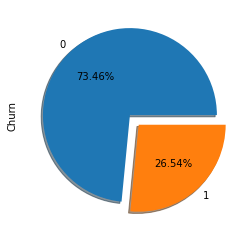

In [28]:
df['Churn'].value_counts().plot(kind='pie',autopct='%.2f%%',explode={0,0.15},shadow=True)

In [29]:
df.groupby(by='gender')['Churn'].mean().to_frame()

,Churn
gender,
Female,0.269209
Male,0.261603


In [30]:
df.groupby(by='Partner')['Churn'].mean().to_frame()

,Churn
Partner,
No,0.329580
Yes,0.196649


In [31]:
df.groupby(by='InternetService')['Churn'].mean().to_frame()

,Churn
InternetService,
DSL,0.189591
Fiber optic,0.418928
No,0.074050


In [32]:
df.groupby(by='StreamingTV')['Churn'].mean().to_frame()

,Churn
StreamingTV,
No,0.335231
No internet service,0.074050
Yes,0.300702


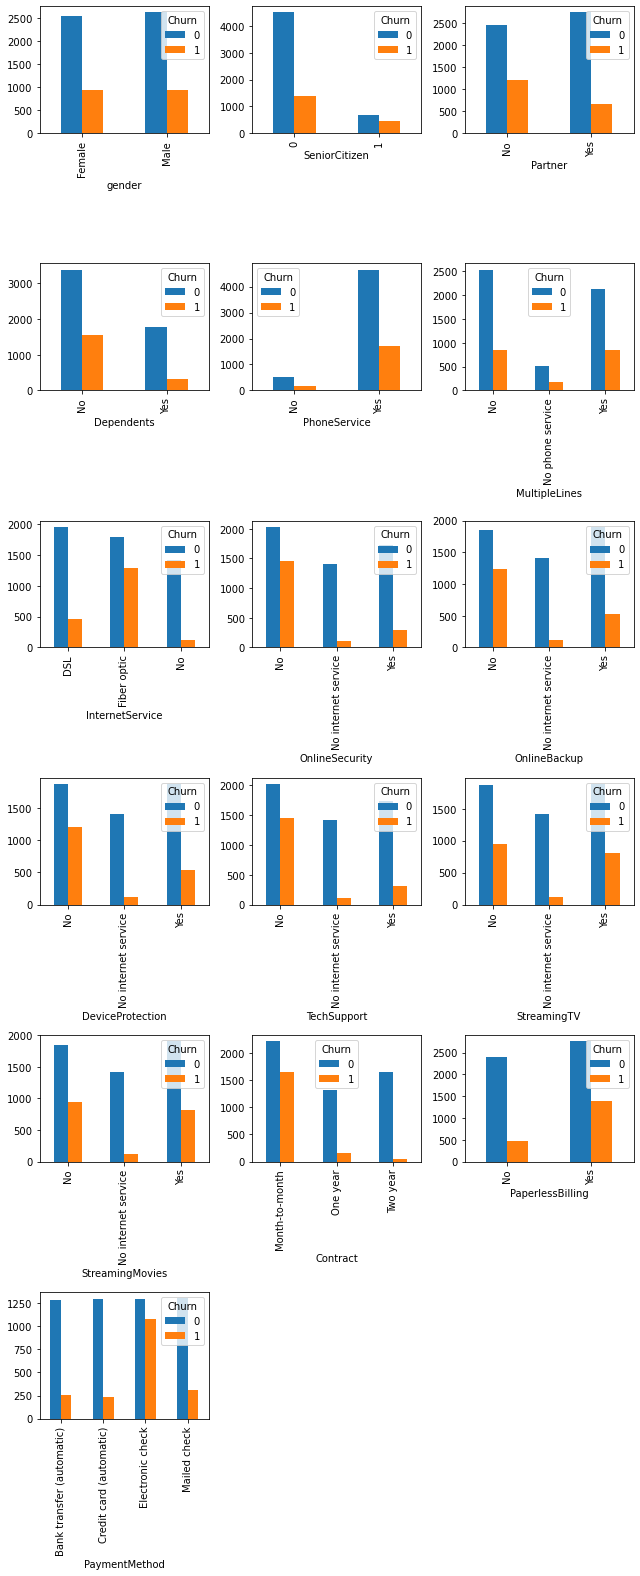

In [33]:
plt.figure(figsize=(9,22))
t=1
for i in cat_cols[:-1]:
    plt.subplot(6,3,t)
    pd.crosstab(df[i],df['Churn']).plot(kind='bar',ax=plt.gca())
    t+=1
plt.tight_layout()
plt.show()

#### Inferences:
* There is no effect of gender on whether a customer will Churn or not.
* People with No partner are more likely to Churn.
* People opting for ```Fiber Optic``` internet service are more likely to Churn
* People having longer contracts retain more which is equivalent to having longer Tenure.

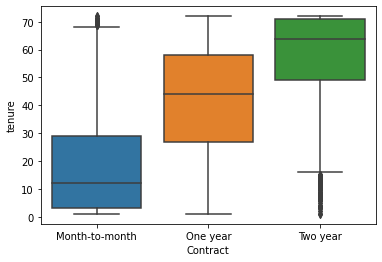

In [34]:
sns.boxplot(df['Contract'],df['tenure'])
plt.show()

#### Encoding

In [35]:
for i in cat_cols:
    print(i)
    print(df[i].value_counts()*100/len(df),end='\n*******************\n')

gender
Male      50.47565
Female    49.52435
Name: gender, dtype: float64
*******************
SeniorCitizen
0    83.785319
1    16.214681
Name: SeniorCitizen, dtype: float64
*******************
Partner
No     51.69672
Yes    48.30328
Name: Partner, dtype: float64
*******************
Dependents
No     70.041176
Yes    29.958824
Name: Dependents, dtype: float64
*******************
PhoneService
Yes    90.316626
No      9.683374
Name: PhoneService, dtype: float64
*******************
MultipleLines
No                  48.132898
Yes                 42.183729
No phone service     9.683374
Name: MultipleLines, dtype: float64
*******************
InternetService
Fiber optic    43.958540
DSL            34.374556
No             21.666903
Name: InternetService, dtype: float64
*******************
OnlineSecurity
No                     49.666335
Yes                    28.666761
No internet service    21.666903
Name: OnlineSecurity, dtype: float64
*******************
OnlineBackup
No                     

In [36]:
enc=['Partner','Dependents','PhoneService','PaperlessBilling']

In [37]:
for i in enc:
    df[i]=df[i].map({'No':0,'Yes':1})

In [38]:
df['gender']=df['gender'].map({'Female':0,'Male':1})

In [39]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1.0,0,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,1,Electronic check,29.85,29.85,0
1,1,0,0,0,34.0,1,No,DSL,Yes,No,Yes,No,No,No,One year,0,Mailed check,56.95,1889.50,0
2,1,0,0,0,2.0,1,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,1,Mailed check,53.85,108.15,1
3,1,0,0,0,45.0,0,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,0,0,0,0,2.0,1,No,Fiber optic,No,No,No,No,No,No,Month-to-month,1,Electronic check,70.70,151.65,1


In [40]:
freq=['InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport',
    'StreamingTV','StreamingMovies','Contract','PaymentMethod']

In [41]:
for i in freq:
    df[i]=df[i].map(df[i].value_counts(normalize=True).to_dict())

In [42]:
df['SeniorCitizen']=df['SeniorCitizen'].astype(int)
df=pd.get_dummies(df)

## 3. Feature Engineering

In [43]:
df['AdditionalCharges']=df['TotalCharges']-(df['MonthlyCharges']*df['tenure'])

In [44]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,AdditionalCharges
0,0,0,1,0,1.0,0,0.343746,0.496663,0.344881,0.439443,0.493114,0.398978,0.395428,0.550192,1,0.335794,29.85,29.85,0,0,1,0,0.00
1,1,0,0,0,34.0,1,0.343746,0.286668,0.438450,0.343888,0.493114,0.398978,0.395428,0.209144,0,0.228880,56.95,1889.50,0,1,0,0,-46.80
2,1,0,0,0,2.0,1,0.343746,0.286668,0.344881,0.439443,0.493114,0.398978,0.395428,0.550192,1,0.228880,53.85,108.15,1,1,0,0,0.45
3,1,0,0,0,45.0,0,0.343746,0.286668,0.438450,0.343888,0.290217,0.398978,0.395428,0.209144,0,0.219225,42.30,1840.75,0,0,1,0,-62.75
4,0,0,0,0,2.0,1,0.439585,0.496663,0.438450,0.439443,0.493114,0.398978,0.395428,0.550192,1,0.335794,70.70,151.65,1,1,0,0,10.25


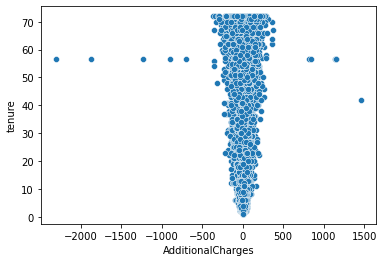

In [45]:
sns.scatterplot(df.AdditionalCharges,df.tenure)
plt.show()

#### Train Test Split, Scaling and Treating Class Imbalance

In [46]:
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import MinMaxScaler

In [47]:
X=df.drop(columns='Churn')
y=df['Churn']
X=sm.add_constant(X)

sc=MinMaxScaler()
X=sc.fit_transform(X)
X=pd.DataFrame(X)

In [48]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,stratify=y,test_size=0.3,random_state=42)
rs = RandomOverSampler(random_state=42)
X_resampled, y_resampled = rs.fit_resample(X_train, y_train)

In [49]:
X_train.shape

(4930, 23)

In [50]:
y_train.shape

(4930,)

In [51]:
X_test.shape

(2113, 23)

In [52]:
y_test.shape

(2113,)

In [53]:
X_resampled.shape

(7244, 23)

## 4. Model Building

In [55]:
def validation(test,pred):
    print('Confusion Matrix\n',confusion_matrix(test,pred))
    print('Accuracy:',accuracy_score(test,pred))
    print('Precison:',precision_score(test,pred))
    print('Recall:',recall_score(test,pred))
    print('F1 Score:',f1_score(test,pred))
    print('Cohen kappa Score:',cohen_kappa_score(test,pred))
    print('Classification Report\n',classification_report(test,pred))

In [56]:
def roc_curv(test,pred):
    fpr,tpr,thres=roc_curve(test,pred)
    print('AUC:',roc_auc_score(test,pred))
    plt.plot(fpr,tpr,color='red')
    plt.plot([0, 1], [0, 1],'b--')
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.title('ROC CURVE')

In [60]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.dummy import DummyClassifier

In [58]:
def model_results(model,x_train,y_train,x_test,y_test):
    print(str(model))

    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
   
    validation(y_test,y_pred)
    
    y_pred_prob = model.predict_proba(x_test)[:,1]
    
    roc_curv(y_test,y_pred_prob)

In [79]:
#### Dummy Model = Random Guessing

DummyClassifier(random_state=42, strategy='most_frequent')
Confusion Matrix
 [[1552    0]
 [ 561    0]]
Accuracy: 0.73450070989115
Precison: 0.0
Recall: 0.0
F1 Score: 0.0
Cohen kappa Score: 0.0
Classification Report
               precision    recall  f1-score   support

           0       0.73      1.00      0.85      1552
           1       0.00      0.00      0.00       561

    accuracy                           0.73      2113
   macro avg       0.37      0.50      0.42      2113
weighted avg       0.54      0.73      0.62      2113

AUC: 0.5


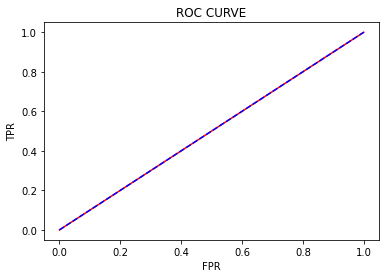

In [62]:
model_results(DummyClassifier(random_state=42, strategy='most_frequent'),X_train,y_train,X_test,y_test)

#### KNN

KNeighborsClassifier(n_neighbors=3)
Confusion Matrix
 [[1312  240]
 [ 278  283]]
Accuracy: 0.754850922858495
Precison: 0.5411089866156787
Recall: 0.5044563279857398
F1 Score: 0.522140221402214
Cohen kappa Score: 0.35754945453563625
Classification Report
               precision    recall  f1-score   support

           0       0.83      0.85      0.84      1552
           1       0.54      0.50      0.52       561

    accuracy                           0.75      2113
   macro avg       0.68      0.67      0.68      2113
weighted avg       0.75      0.75      0.75      2113

AUC: 0.7373304757704394


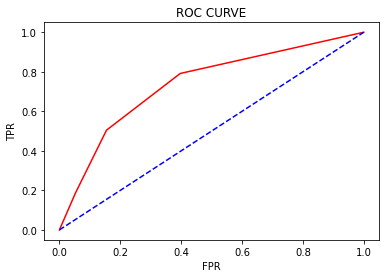

In [63]:
model_results(KNeighborsClassifier(n_neighbors=3),X_train,y_train,X_test,y_test)

#### Decision Tree

DecisionTreeClassifier(criterion='entropy', max_depth=9, min_samples_leaf=2)
Confusion Matrix
 [[1335  217]
 [ 262  299]]
Accuracy: 0.7733080927591103
Precison: 0.5794573643410853
Recall: 0.5329768270944741
F1 Score: 0.5552460538532963
Cohen kappa Score: 0.4034904396584291
Classification Report
               precision    recall  f1-score   support

           0       0.84      0.86      0.85      1552
           1       0.58      0.53      0.56       561

    accuracy                           0.77      2113
   macro avg       0.71      0.70      0.70      2113
weighted avg       0.77      0.77      0.77      2113

AUC: 0.7551138660712644


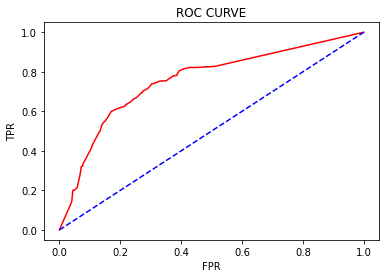

In [64]:
model_results(DecisionTreeClassifier(criterion='entropy',max_depth=9, min_samples_leaf=2),X_train,y_train,X_test,y_test)

#### Random Forest

RandomForestClassifier(max_depth=5, n_estimators=500)
Confusion Matrix
 [[1435  117]
 [ 322  239]]
Accuracy: 0.792238523426408
Precison: 0.6713483146067416
Recall: 0.42602495543672014
F1 Score: 0.5212649945474372
Cohen kappa Score: 0.39694861944793514
Classification Report
               precision    recall  f1-score   support

           0       0.82      0.92      0.87      1552
           1       0.67      0.43      0.52       561

    accuracy                           0.79      2113
   macro avg       0.74      0.68      0.69      2113
weighted avg       0.78      0.79      0.78      2113

AUC: 0.8404795376444861


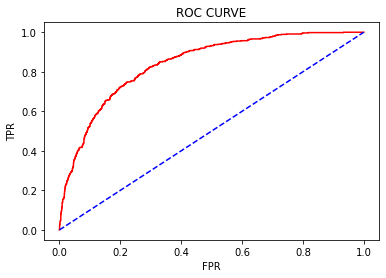

In [65]:
model_results(RandomForestClassifier(n_estimators=500,max_depth=5),X_train,y_train,X_test,y_test)

#### Gradient Boosting

GradientBoostingClassifier(n_estimators=400)
Confusion Matrix
 [[1388  164]
 [ 282  279]]
Accuracy: 0.7889256980596309
Precison: 0.6297968397291196
Recall: 0.49732620320855614
F1 Score: 0.5557768924302788
Cohen kappa Score: 0.4198507023490432
Classification Report
               precision    recall  f1-score   support

           0       0.83      0.89      0.86      1552
           1       0.63      0.50      0.56       561

    accuracy                           0.79      2113
   macro avg       0.73      0.70      0.71      2113
weighted avg       0.78      0.79      0.78      2113

AUC: 0.8254308166565596


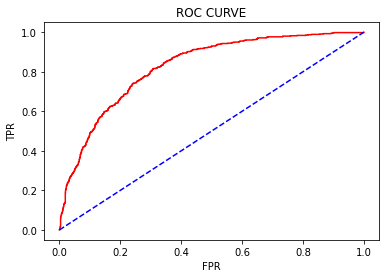

In [66]:
model_results(GradientBoostingClassifier(n_estimators=400,learning_rate=0.1),X_train,y_train,X_test,y_test)

## 5. HyperTuning

In [67]:
tuned_paramaters = [{'criterion': ['entropy', 'gini'], 
                     'max_depth': range(2, 10),
                     'max_features': ["sqrt", "log2"],
                     'min_samples_split': range(2,10),
                     'min_samples_leaf': range(1,10)}]
dt=DecisionTreeClassifier(random_state = 42)
tree_grid = GridSearchCV(estimator = dt, param_grid = tuned_paramaters, cv = 5)
dt_model_tuned = tree_grid.fit(X_train, y_train)
print('Best parameters for decision tree classifier: ', dt_model_tuned.best_params_, '\n')

Best parameters for decision tree classifier:  {'criterion': 'entropy', 'max_depth': 6, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2} 



DecisionTreeClassifier(criterion='entropy', max_depth=6, max_features='sqrt')
Confusion Matrix
 [[1430  122]
 [ 370  191]]
Accuracy: 0.7671557027922385
Precison: 0.610223642172524
Recall: 0.3404634581105169
F1 Score: 0.437070938215103
Cohen kappa Score: 0.3048858767458157
Classification Report
               precision    recall  f1-score   support

           0       0.79      0.92      0.85      1552
           1       0.61      0.34      0.44       561

    accuracy                           0.77      2113
   macro avg       0.70      0.63      0.65      2113
weighted avg       0.75      0.77      0.74      2113

AUC: 0.7953132752632448


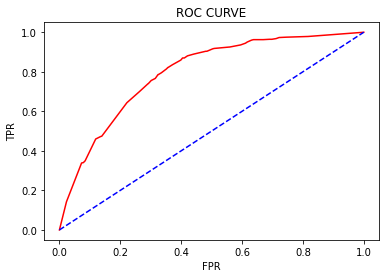

In [71]:
model_results(DecisionTreeClassifier(criterion='entropy',max_depth=6,max_features='sqrt', min_samples_leaf=1,min_samples_split=2),X_train,y_train,X_test,y_test)

In [68]:
tuned_paramaters = {'n_estimators': [100, 200, 300,400,500],'learning_rate': [0.1, 0.05, 0.01]}
gb=GradientBoostingClassifier(random_state = 42)
tree_grid = GridSearchCV(estimator=gb, param_grid=tuned_paramaters, cv = 5)
gb_model_tuned = tree_grid.fit(X_train, y_train)
print('Best parameters for gradient boosting classifier: ',gb_model_tuned.best_params_, '\n')

Best parameters for gradient boosting classifier:  {'learning_rate': 0.01, 'n_estimators': 400} 



## 6. Model Selection

#### Gradient Boosting works best after tuning
### Feature Importance

Text(0.5, 1.0, 'Feature Importance of each feature')

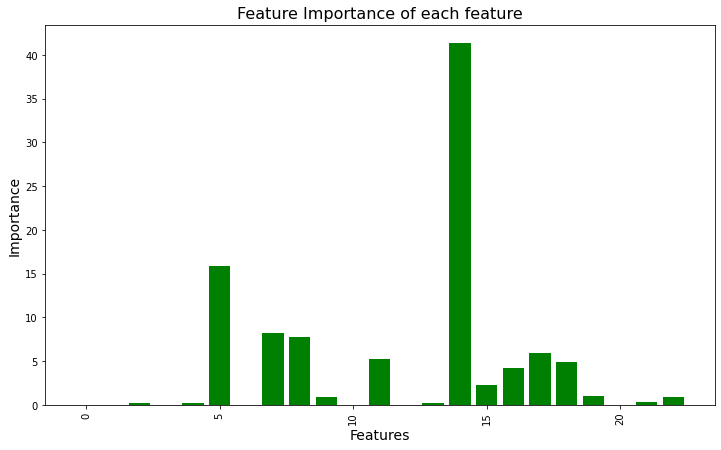

In [73]:
plt.figure(figsize=(12,7))
gb=GradientBoostingClassifier(n_estimators=400,learning_rate=0.01)
gb.fit(X_train,y_train)
plt.bar(X.columns,gb.feature_importances_*100, color='green')
plt.xlabel('Features', fontsize=14)
plt.ylabel('Importance', fontsize=14)
plt.xticks(rotation=90)
plt.title('Feature Importance of each feature', fontsize=16)

#### Contract and Phone-Service are two most important features

In [78]:
# Identify the top 5 most important features
top_features_indices = gb.feature_importances_.argsort()[::-1][:10]
top_features = X_train.columns[top_features_indices]

# Create a new dataset with only the top 5 features
X_train_top = X_train[top_features]
X_test_top = X_test[top_features]

# Initialize and train the Gradient Boosting Classifier
gb_top = GradientBoostingClassifier(n_estimators=400, learning_rate=0.01, random_state=42)
gb_top.fit(X_train_top, y_train)

# Evaluate the model on the testing set
y_pred_top = gb_top.predict(X_test_top)

# Calculate evaluation metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

accuracy = accuracy_score(y_test, y_pred_top)
conf_matrix = confusion_matrix(y_test, y_pred_top)
class_report = classification_report(y_test, y_pred_top)

# Print evaluation metrics
print("Accuracy:", accuracy)
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)


Accuracy: 0.8059630856601988

Confusion Matrix:
 [[1428  124]
 [ 286  275]]

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.92      0.87      1552
           1       0.69      0.49      0.57       561

    accuracy                           0.81      2113
   macro avg       0.76      0.71      0.72      2113
weighted avg       0.79      0.81      0.79      2113



## Result 
#### Gradient Boosting (learning rate = 0.01, n_estimators = 400) works even better with top 10 most important features with :
* Accuarcy - 81%
* F1-Score - 87%